In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/market-type-classification/sample_submission.csv
/kaggle/input/market-type-classification/train.csv
/kaggle/input/market-type-classification/test.csv


## Importing Libraries


In [2]:
## Import major libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
## Data Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

## Get Data Path

In [3]:
train_path = '/kaggle/input/market-type-classification/train.csv'
test_path = '/kaggle/input/market-type-classification/test.csv'

In [4]:
## Show the first 5 rows to take a big look about data
df_train = pd.read_csv(train_path)
df_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,1
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,0


In [5]:
## Get DataSet shape
df_train.shape

(8523, 11)

## Data Exploration

In [6]:
df_train.describe()

,X2,X4,X6,X8,Y
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,0.673941
std,4.643456,0.051598,62.275067,8.371760,1.046831
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.773750,0.026989,93.826500,1987.000000,0.000000
50%,12.600000,0.053931,143.012800,1999.000000,0.000000
75%,16.850000,0.094585,185.643700,2004.000000,1.000000
max,21.350000,0.328391,266.888400,2009.000000,3.000000


In [7]:
## Check the nulls
df_train.isna().sum() 

X1        0
X2     1463
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9     2410
X10       0
Y         0
dtype: int64

In [8]:
## more info about data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      8523 non-null   object 
 1   X2      7060 non-null   float64
 2   X3      8523 non-null   object 
 3   X4      8523 non-null   float64
 4   X5      8523 non-null   object 
 5   X6      8523 non-null   float64
 6   X7      8523 non-null   object 
 7   X8      8523 non-null   int64  
 8   X9      6113 non-null   object 
 9   X10     8523 non-null   object 
 10  Y       8523 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 732.6+ KB


In [9]:
num_columns = [col for col in df_train.columns if df_train[col].dtype in ['float64','int64', 'int32', 'float32']]
num_columns = num_columns[:-1]
num_columns

['X2', 'X4', 'X6', 'X8']

In [10]:
## Dealing with Categorical nulls
categ_impute = SimpleImputer(strategy = 'most_frequent')
df_train[['X9']] = categ_impute.fit_transform(df_train[['X9']])

In [11]:
## Dealing with Numerical nulls
num_impute = SimpleImputer(strategy = 'median')
df_train[['X2']] = num_impute.fit_transform(df_train[['X2']])

In [12]:
## Check that data has no nulls
df_train.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
Y      0
dtype: int64

## Data Visualization

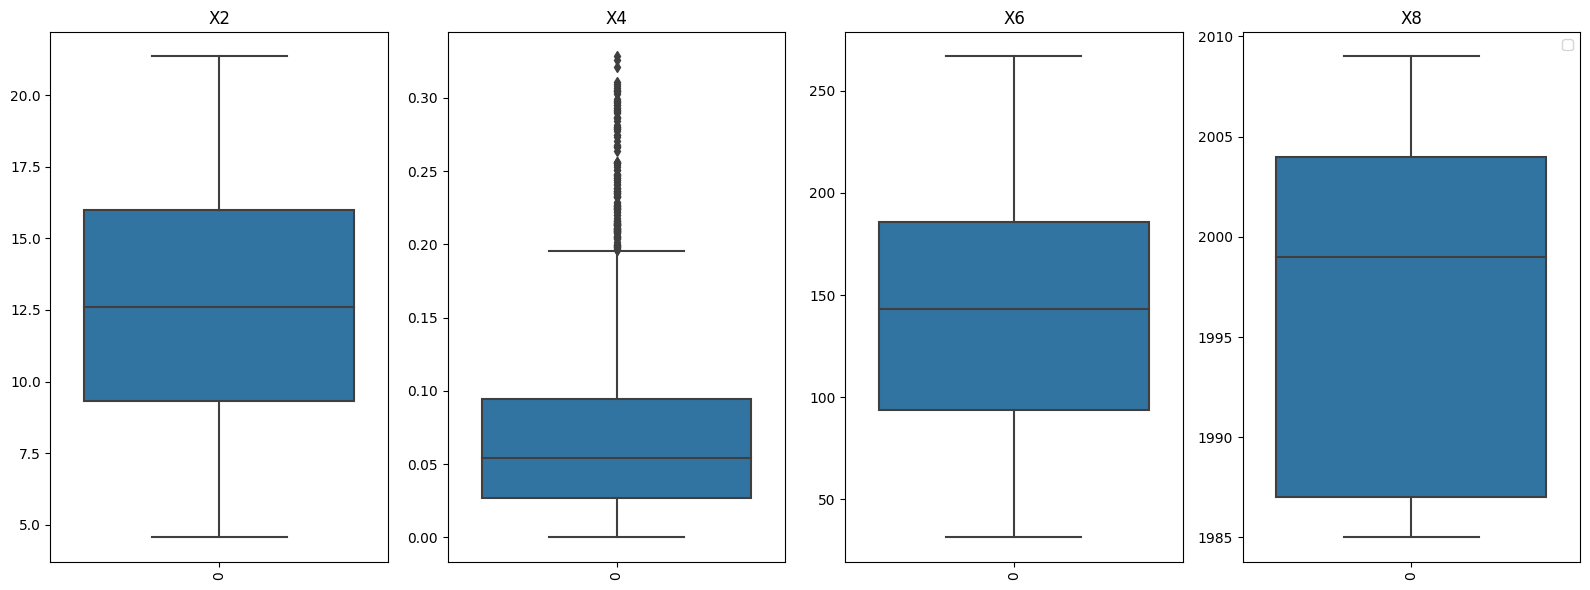

In [13]:
## Check the outliers
## BoxPlot 
plt.figure(figsize = (16,6))
for i, col in enumerate(num_columns):
    plt.subplot(1, 4, i + 1)  # Create a subplot
    sns.boxplot(df_train[col])
    plt.title(col)
    plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

In [14]:
## From the boxplot there's outliers in X4 
df_train.drop('X4', axis = 1, inplace = True)

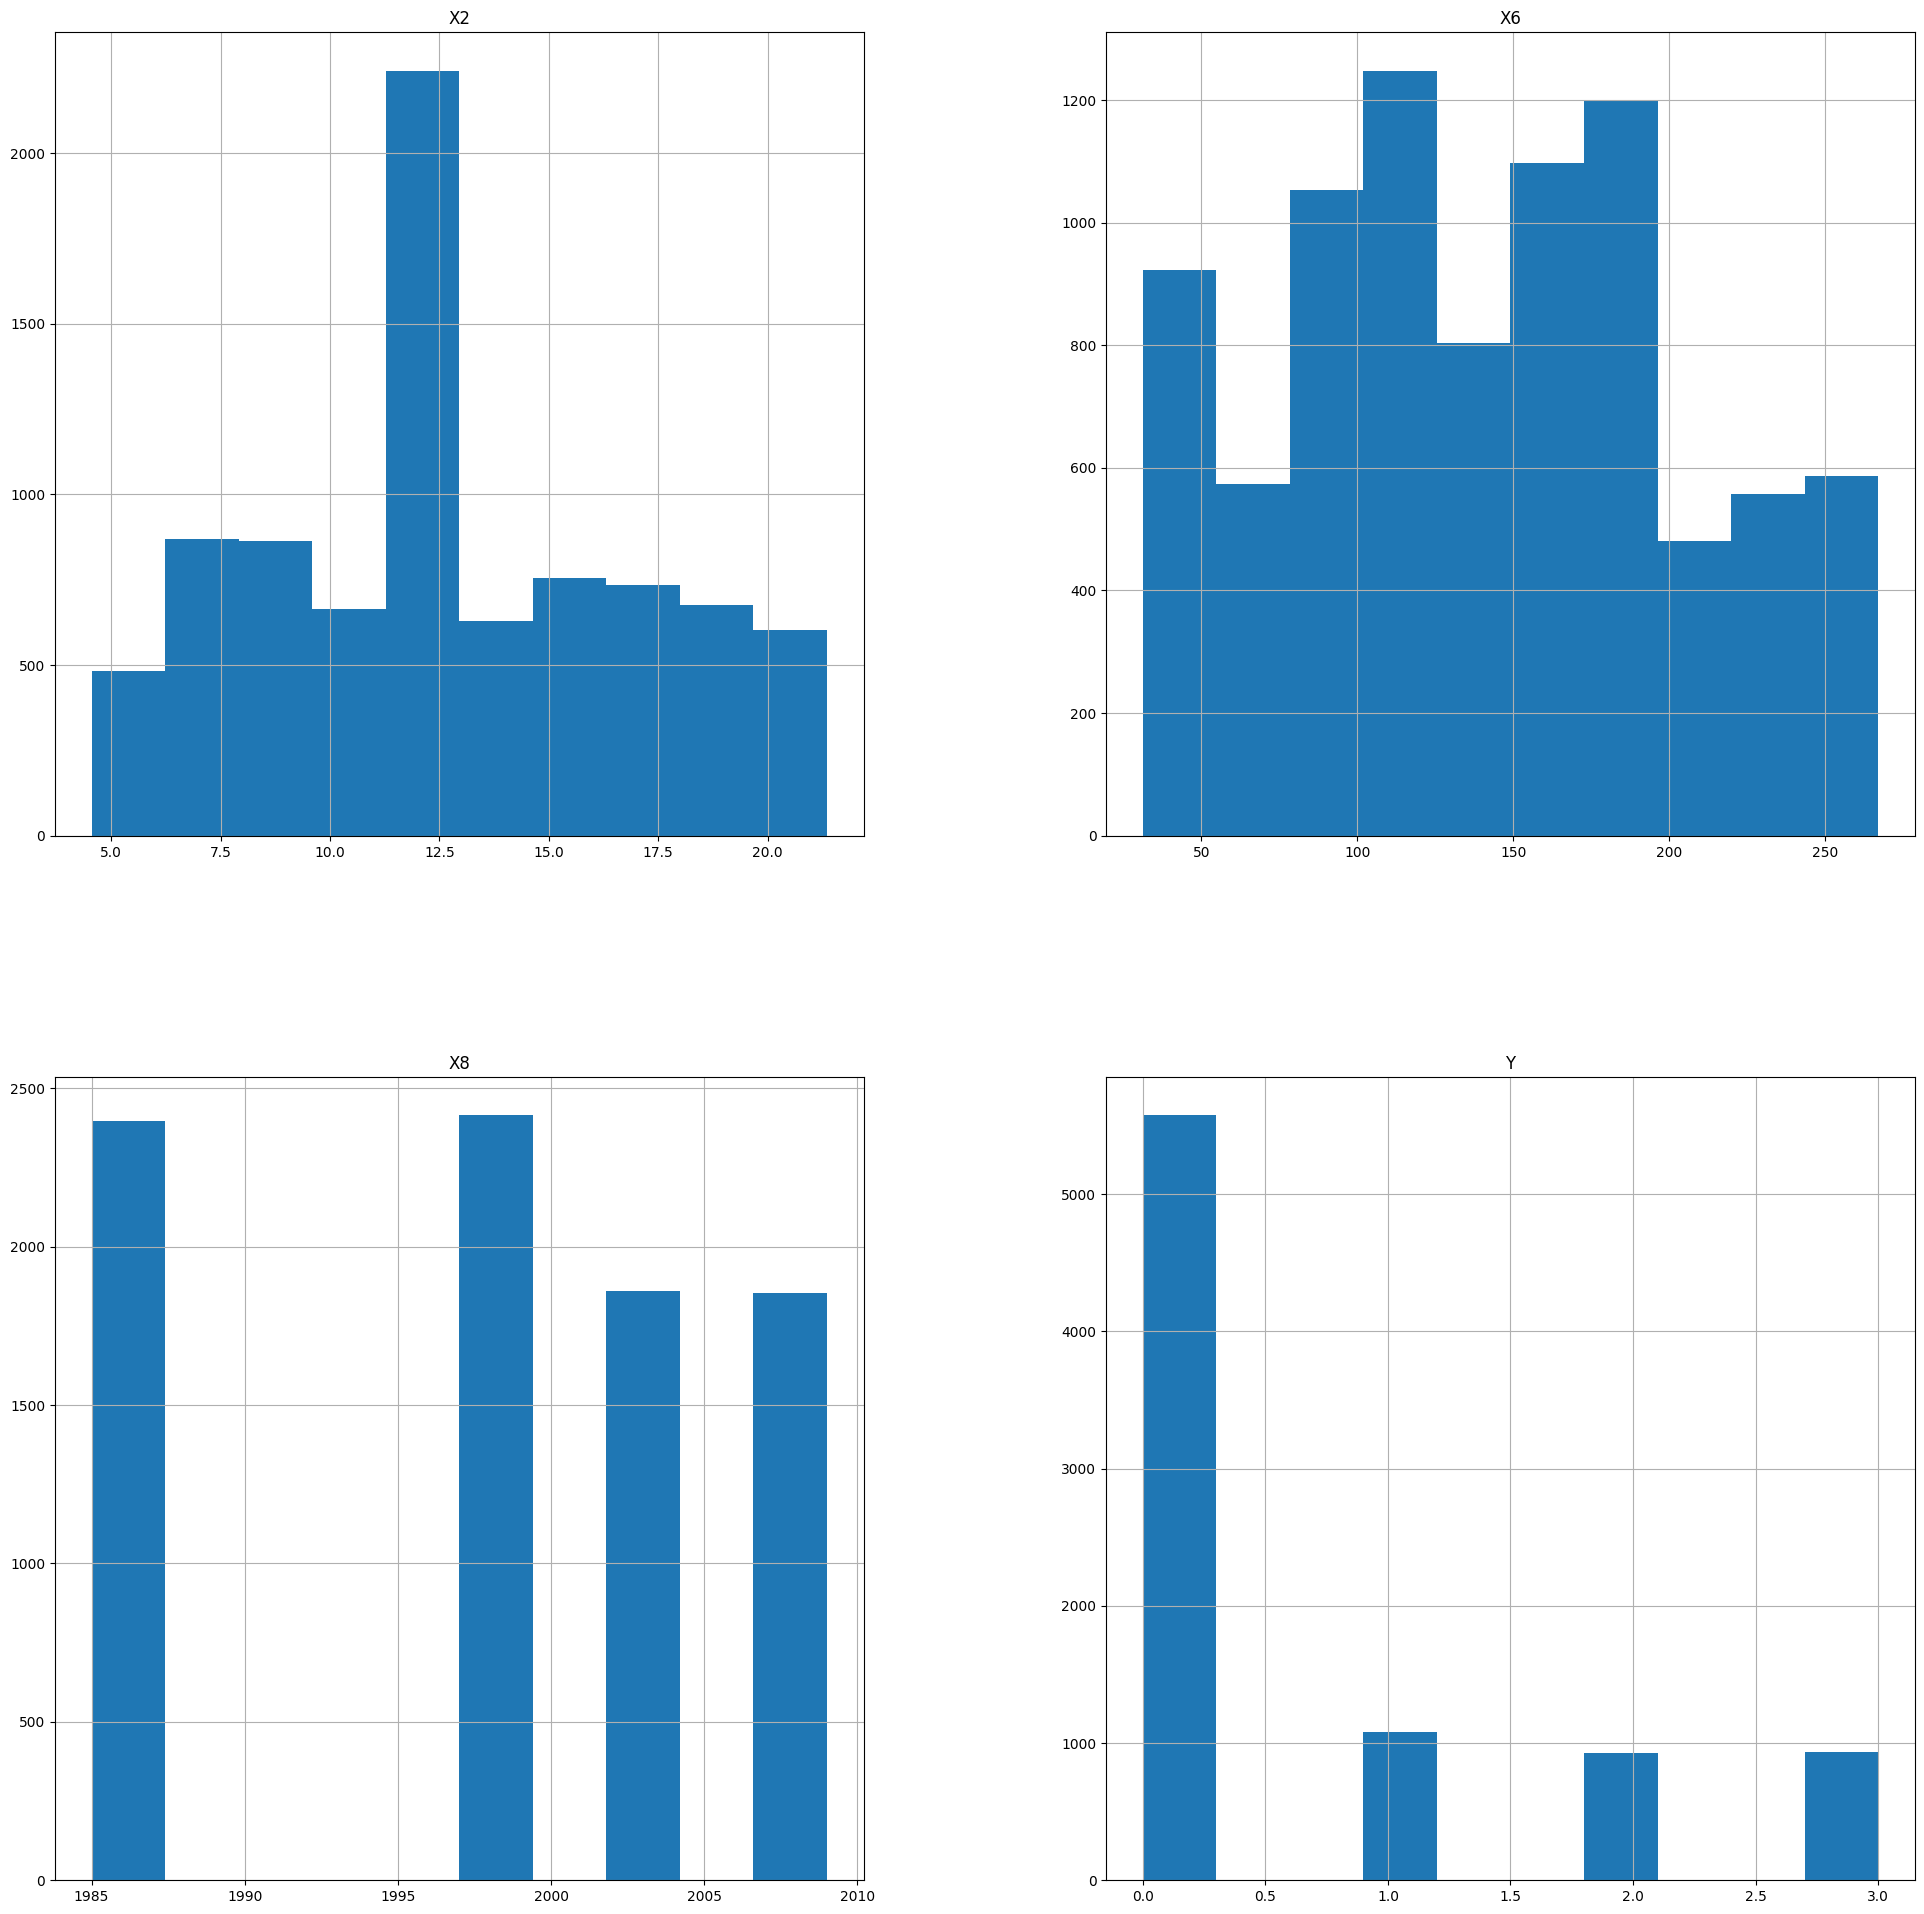

In [15]:
df_train.hist(figsize= (24,24))
plt.show()

## Feature Engineering

In [16]:
## Get Categorical Columns
categ_columns = [col for col in df_train.columns if df_train[col].dtype not in ['float64','int64', 'int32', 'float32']]
categ_columns

['X1', 'X3', 'X5', 'X7', 'X9', 'X10']

In [17]:
## Get Numerical Columns
num_columns = [col for col in df_train.columns if df_train[col].dtype in ['float64','int64', 'int32', 'float32']]
num_columns = num_columns[:-1]
num_columns

['X2', 'X6', 'X8']

In [18]:
## Categorical Encoding
categ_encod = LabelEncoder()
for col in categ_columns:
    df_train[col] = categ_encod.fit_transform(df_train[col])

In [19]:
## Numerical Scaling
num_scale = StandardScaler()
df_train[num_columns] = num_scale.fit_transform(df_train[num_columns])

In [20]:
df_final = df_train

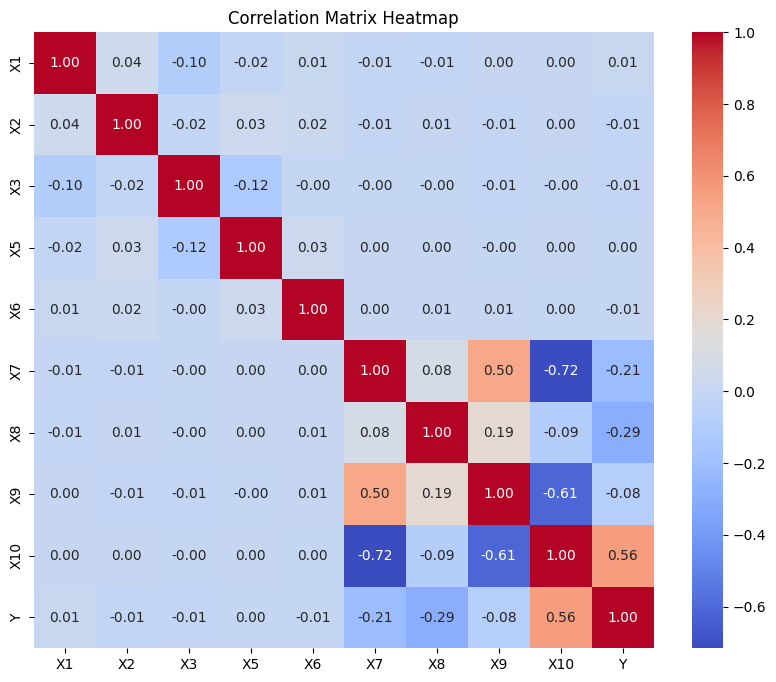

In [21]:
## Heat Map
corr_matrix = df_final.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [22]:
train_columns = ['X7','X8','X9','X10']

In [23]:
X = df_final[train_columns]
Y = df_final['Y']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size= 0.2, random_state=125)

In [25]:
model = LogisticRegression(max_iter=200)
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [26]:
# Make predictions
y_predict = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy * 100} %')

Accuracy: 100.0 %


## Test Data

In [27]:
df_test = pd.read_csv(test_path)

In [28]:
df_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3


In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      5681 non-null   object 
 1   X2      4705 non-null   float64
 2   X3      5681 non-null   object 
 3   X4      5681 non-null   float64
 4   X5      5681 non-null   object 
 5   X6      5681 non-null   float64
 6   X7      5681 non-null   object 
 7   X8      5681 non-null   int64  
 8   X9      4075 non-null   object 
 9   X10     5681 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 444.0+ KB


In [30]:
df_test.isna().sum()

X1        0
X2      976
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9     1606
X10       0
dtype: int64

In [31]:
df_test[['X2']] = num_impute.transform(df_test[['X2']])

In [32]:
df_test[['X9']] = categ_impute.transform(df_test[['X9']])

In [33]:
df_test.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
dtype: int64

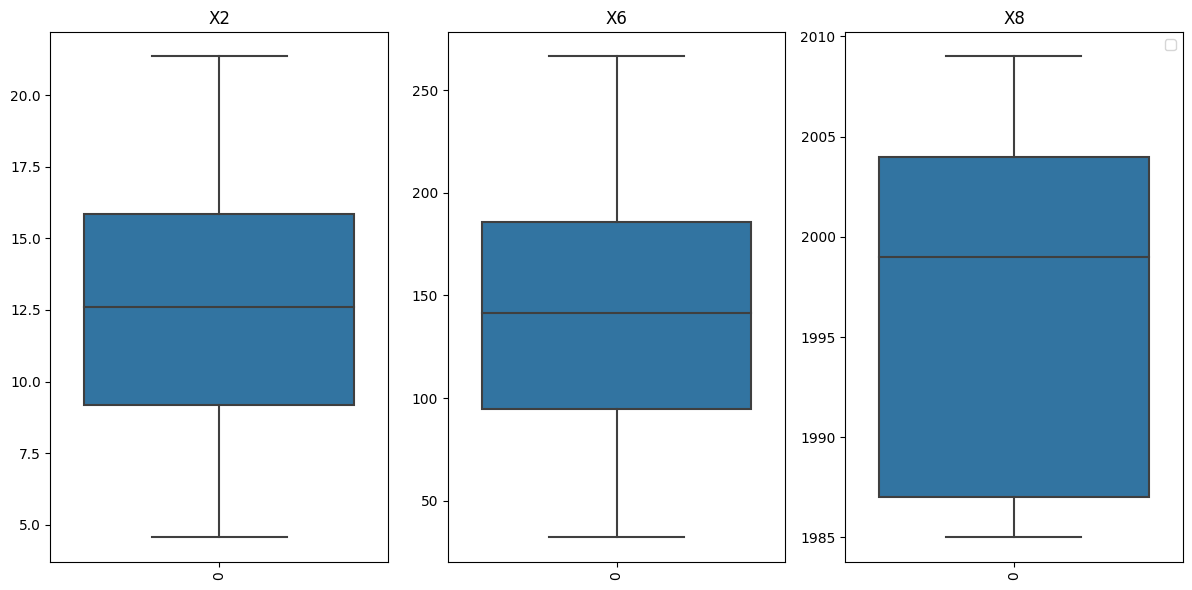

In [34]:
## Check the outliers
## BoxPlot 
plt.figure(figsize = (16,6))
for i, col in enumerate(num_columns):
    plt.subplot(1, 4, i + 1)  # Create a subplot
    sns.boxplot(df_test[col])
    plt.title(col)
    plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

In [35]:
## From the boxplot there's outliers in X4 
## Removing Outliers
df_test.drop('X4', axis = 1, inplace = True)

In [36]:
for col in categ_columns:
    df_test[col] = categ_encod.fit_transform(df_test[col])

In [37]:
df_test[num_columns] = num_scale.transform(df_test[num_columns])

In [38]:
df_test.head()

,X1,X2,X3,X5,X6,X7,X8,X9,X10
0,1103,1.877595,1,13,-0.532035,9,0.139541,1,0
1,1067,-1.067761,4,4,-0.861920,2,1.095190,1,1
2,1406,0.422660,1,11,1.618094,0,0.020085,1,2
3,809,-1.300788,1,13,0.225484,2,1.095190,1,1
4,1184,-0.050490,2,4,1.497272,5,-1.532846,1,2


In [39]:
y_test_predict = model.predict(df_test[train_columns])

In [40]:
df_test['label'] = y_test_predict

In [41]:
df_test['row_id'] = df_test.index

In [42]:
df_test[['row_id','label']].to_csv('/kaggle/working/submission.csv',index=False)